<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 124.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 140.0 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 136.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 148.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 155.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [5]:
duplicates = df.duplicated()

# Number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [6]:
# Count of missing values in 'CodingActivities'
missing_count = df['CodingActivities'].isnull().sum()
print(f"Number of missing values in 'CodingActivities': {missing_count}")

# Optionally, to get the percentage of missing values
missing_percentage = df['CodingActivities'].isnull().mean() * 100
print(f"Percentage of missing values in 'CodingActivities': {missing_percentage:.2f}%")

Number of missing values in 'CodingActivities': 10971
Percentage of missing values in 'CodingActivities': 16.77%


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [7]:
df['CodingActivities'] = df['CodingActivities'].ffill()

**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [9]:
#Find compensation-related columns
comp_cols = [col for col in df.columns if 'comp' in col.lower() or 'salary' in col.lower()]
print("Potential compensation columns found:")
print(comp_cols)

Potential compensation columns found:
['CompTotal', 'AIComplex', 'ConvertedCompYearly']


In [10]:
if 'ConvertedCompYearly' in df.columns:
    print("\nUsing 'ConvertedCompYearly' for compensation analysis")
    comp_col = 'ConvertedCompYearly'

    #Basic stats
    print(f"\nCompensation Statistics:")
    print(df[comp_col].describe().apply(lambda x:f"{x:,.2f}"))

    #missing values check
    missing_pct = df[comp_col].isnull().mean()*100
    print(f"\nMissing values:{missing_pct:.2f}%")
else:
    print("\n'ConvertedCompYearly' not found. Using alternative:")
    comp_col = comp_cols[0] if comp_cols else None
    print(f"Selected column:{comp_col}")


Using 'ConvertedCompYearly' for compensation analysis

Compensation Statistics:
count        23,435.00
mean         86,155.29
std         186,756.97
min               1.00
25%          32,712.00
50%          65,000.00
75%         107,971.50
max      16,256,603.00
Name: ConvertedCompYearly, dtype: object

Missing values:64.19%


In [11]:
#Create clean series for normalization (drop missing values)
comp_clean = df[comp_col].dropna()

print(f"\nClean compensation data ({len(comp_clean)} rows):")
print(comp_clean.head())


Clean compensation data (23435 rows):
72       7322.0
374     30074.0
379     91295.0
385     53703.0
389    110000.0
Name: ConvertedCompYearly, dtype: float64


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [14]:
comp_clean = df['ConvertedCompYearly'].dropna()
min_val = comp_clean.min()
max_val = comp_clean.max()

normalized = (comp_clean - min_val) / (max_val - min_val)
print("Min-Max Normalized Values:")
print(normalized.head())

Min-Max Normalized Values:
72     0.000450
374    0.001850
379    0.005616
385    0.003303
389    0.006766
Name: ConvertedCompYearly, dtype: float64


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [15]:
mean = comp_clean.mean()
std = comp_clean.std()

standardized = (comp_clean - mean) / std
print("\nZ-Score Standardized Values:")
print(standardized.head())


Z-Score Standardized Values:
72    -0.422117
374   -0.300290
379    0.027521
385   -0.173767
389    0.127678
Name: ConvertedCompYearly, dtype: float64


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


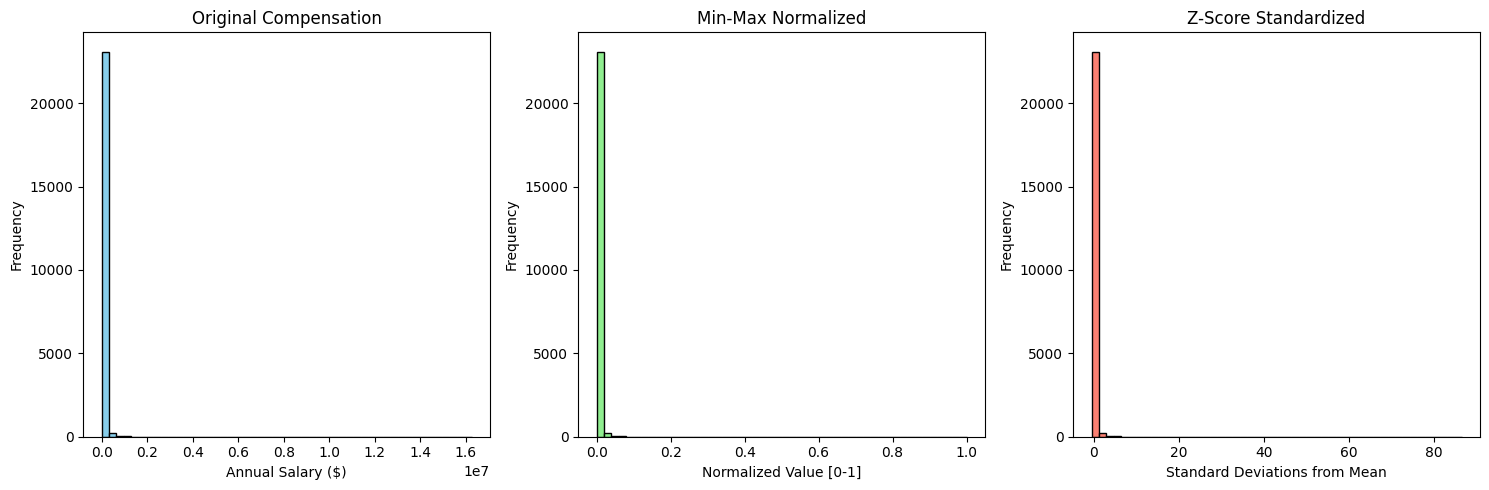

In [17]:
plt.figure(figsize=(15, 5))

# Original Distribution
plt.subplot(1, 3, 1)
plt.hist(comp_clean, bins=50, color='skyblue', edgecolor='black')
plt.title('Original Compensation')
plt.xlabel('Annual Salary ($)')
plt.ylabel('Frequency')

# Min-Max Normalized
plt.subplot(1, 3, 2)
plt.hist(normalized, bins=50, color='lightgreen', edgecolor='black')
plt.title('Min-Max Normalized')
plt.xlabel('Normalized Value [0-1]')
plt.ylabel('Frequency')

# Z-Score Standardized
plt.subplot(1, 3, 3)
plt.hist(standardized, bins=50, color='salmon', edgecolor='black')
plt.title('Z-Score Standardized')
plt.xlabel('Standard Deviations from Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
